<a href="https://colab.research.google.com/github/jeddyclass/202207.NCUT/blob/main/session_02_descstats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
from matplotlib.font_manager import fontManager

In [61]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
sns.set(style='darkgrid')
plt.rcParams['axes.unicode_minus']=False
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.family']='Taipei Sans TC Beta'

--2022-07-10 06:22:32--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.102, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fc54nun4ntsgs30vmfdgqj56sglmndhf/1657434150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=273d9fba-397e-4f83-8959-bc4442dcd3e9 [following]
--2022-07-10 06:22:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fc54nun4ntsgs30vmfdgqj56sglmndhf/1657434150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=273d9fba-397e-4f83-8959-bc4442dcd3e9
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to doc-0k

In [100]:
#warnings.filterwarnings('ignore')

In [101]:
#載入數據
iris=load_iris()
#display(iris)
print(iris.data[:10],iris.target[:10])
#iris.feature_names:特徵列名稱(sepal lenght/sepal width/petal length/petal width)
#iris.target_name:鳶尾花名(setosa/versicolor/virginica)
print(iris.feature_names,iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [102]:
data=np.concatenate([iris.data,iris.target.reshape(-1,1)],axis=1)
print(type(data))
print(data[:10])
print(data.dtype)
data=pd.DataFrame(data,
columns=['sepal_length','sepal_width','petal_length','petal_width','type'])
print(type(data))
data.sample(10)
print(data.head())
data.info()

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]
float64
<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length  petal_width  type
0           5.1          3.5           1.4          0.2   0.0
1           4.9          3.0           1.4          0.2   0.0
2           4.7          3.2           1.3          0.2   0.0
3           4.6          3.1           1.5          0.2   0.0
4           5.0          3.6           1.4          0.2   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   pet

In [103]:
#花萼長度_平均值
mean=data['sepal_length'].mean()
#花萼長度_中位數
median=data['sepal_length'].median()
#花萼長度_眾數
s=data['sepal_length'].mode()

print(type(s))
#print(s.info())
mode=s.iloc[0]
print(mean,median,mode)

<class 'pandas.core.series.Series'>
5.843333333333334 5.8 5.0


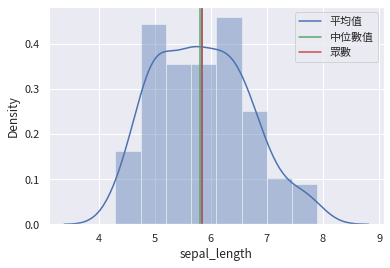

In [104]:
from scipy import stats
stats.mode(data['sepal_length']).mode

sns.distplot(data['sepal_length'])
plt.axvline(mean,ls="-",color='b',label='平均值')
plt.axvline(median,ls="-",color='g',label='中位數值')
plt.axvline(mean,ls="-",color='r',label='眾數')
plt.legend()

In [114]:
#numpy
x = [2, 5, 12, 18, 22, 31, 38, 42, 48]

print(np.quantile(x,q=[0.25,0.5,0.75]))
print(np.percentile(x,q=[25,50,75]))


[12. 22. 38.]
[12. 22. 38.]


In [115]:
#pandas
x = [2, 5, 12, 18, 22, 31, 38, 42, 48]
s=pd.Series(x)
print(s.describe())

count     9.000000
mean     24.222222
std      16.483156
min       2.000000
25%      12.000000
50%      22.000000
75%      38.000000
max      48.000000
dtype: float64


In [117]:
#變異數
var=data['sepal_length'].var()
#標準差
std=data['sepal_length'].std()
print(var, std)

0.6856935123042507 0.828066127977863


In [118]:
#左偏模擬
t1=np.random.randint(1,11,size=200)
t2=np.random.randint(11,21,size=800)
t3=np.concatenate([t1,t2])
left_skew=pd.Series(t3)
#右偏模擬
t1=np.random.randint(1,11,size=800)
t2=np.random.randint(11,21,size=200)
t3=np.concatenate([t1,t2])
right_skew=pd.Series(t3)

-0.7270917013487257 0.8235850017456586


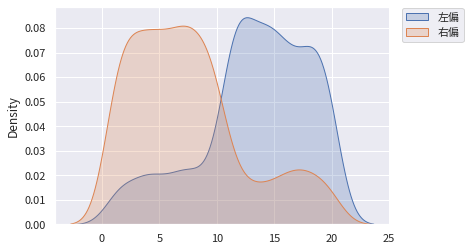

In [119]:
#偏度
fig, ax = plt.subplots()
print(left_skew.skew(),right_skew.skew())

sns.kdeplot(left_skew, ax=ax, shade=True, label='左偏')
sns.kdeplot(right_skew, ax=ax, shade=True, label='右偏')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

標準常態分佈峰度： -0.014418795479453461 標準差： 0.9978832821614515
花萼寬度峰度： 0.2282490424681929 標準差： 0.4358662849366982
花瓣長度峰度： -1.4021034155217518 標準差： 1.7652982332594662


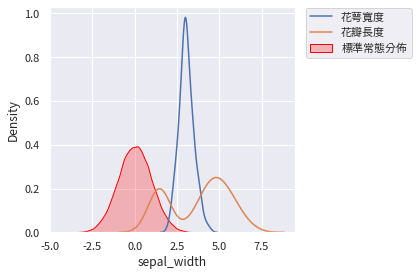

In [94]:
#峰度
standard_normal=pd.Series(np.random.normal(0,1,size=100000))
print('標準常態分佈峰度：',standard_normal.kurt(), '標準差：',standard_normal.std())
print('花萼寬度峰度：',data['sepal_width'].kurt(),'標準差：',data['sepal_width'].std())
print('花瓣長度峰度：',data['petal_length'].kurt(),'標準差：',data['petal_length'].std())

fig, ax = plt.subplots()

sns.kdeplot(standard_normal, ax=ax, color='red', fill=True, label='標準常態分佈')
sns.kdeplot(data['sepal_width'], ax=ax, label='花萼寬度')
sns.kdeplot(data['petal_length'], ax=ax, label='花瓣長度')

ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.tight_layout()
plt.show()